In [41]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import random
import pickle
import time

In [2]:
DataDir = 'ignore_folder/data'
Categories = ['a4a3','a67e','a447','a440','a4e9','a4a7','a46c','a548']
Categories_fifty = ['a447', 'a440', 'a476', 'a67e', 'ae61', 'a470', 'a448', 'a4e9', 'a6ca', 'b773', 'a8e4', 'a4e8', 'a8c6', 'a4d2', 'a8bd', 'a8ae', 'a4a7', 'a46c', 'a46b', 'a453', 'a454', 'b3bd', 'a5d5', 'a5aa', 'a5bf', 'b54c', 'a56b', 'b0a8', 'a6e6', 'a4e5', 'a4fd', 'bb50', 'a4eb', 'a6a8', 'a6db', 'b16f', 'aaf8', 'a4d1', 'a4bd', 'b6c0', 'a4a3', 'a548', 'a4a4', 'aaf7', 'aaf9', 'aacc', 'a451', 'a45f', 'a5ce', 'a457', 'aa46', 'a46a']
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 'a5ce', 'a457', 'adab', 'aa46', 'a46a']
Categories_selected = []

In [3]:
for category in Categories:  # characters
    path = os.path.join(DataDir,category)  # create path to characters
    for img in os.listdir(path):  # iterate over each image
        if 'jinwen' or 'chuxi' in img:
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#             plt.imshow(img_array, cmap='gray')  # graph it
#             plt.show()  # display!
            try:
                print(img_array.shape)
            except Exception as e:
                pass

#         break  # we just want one for now so break
#     break  #...and one more!

(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(

(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(65, 79)
(

In [4]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
img_array.shape

(65, 79)

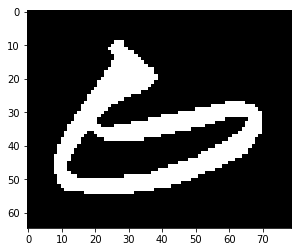

In [6]:
IMG_X = 65
IMG_Y = 79

new_array = cv2.resize(img_array, (IMG_Y, IMG_X)) # after checkning they need to be rearanged
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            if 'jinwen' or 'chuxi' in img:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                    training_data.append([new_array, class_num])
                except Exception as e:
                    pass

In [8]:
create_training_data()

In [9]:
print(len(training_data))

1965


In [10]:
for x in training_data:
    print(x[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [11]:
random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

6
7
2
4
5
1
5
4
6
5


In [13]:
train_X = []
train_y = []
for features, label in training_data:
    train_X.append(features)
    train_y.append(label)
train_X = np.array(train_X)

In [14]:
train_X.shape

(1965, 65, 79)

In [46]:
pickle_out = open('ignore_folder/train_X.pickle', 'wb')
pickle.dump(train_X, pickle_out)
pickle_out.close()
pickle_out = open('ignore_folder/train_y.pickle', 'wb')
pickle.dump(train_y, pickle_out)
pickle_out.close()

In [47]:
pickle_in = open('ignore_folder/train_X.pickle', 'rb')
Xtrain = pickle.load(pickle_in)
pickle_in = open('ignore_folder/train_y.pickle', 'rb')
ytrain = pickle.load(pickle_in)

In [48]:
type(Xtrain)

numpy.ndarray

In [49]:
Xtrain.shape

(1965, 65, 79)

In [50]:
type(Xtrain[0])

numpy.ndarray

In [51]:
type(ytrain)

list

In [52]:
ytrain = np.asarray(ytrain)

In [53]:
type(ytrain)

numpy.ndarray

In [23]:
ytrain[:10]

array([6, 7, 2, 4, 5, 1, 5, 4, 6, 5])

In [24]:
Xtrain[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

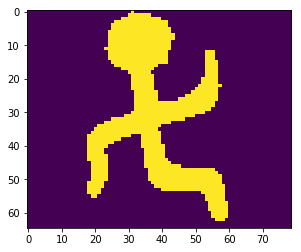

In [25]:
plt.imshow(Xtrain[0])

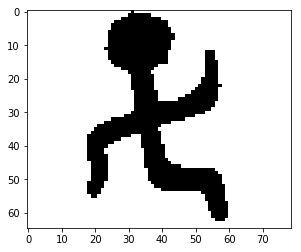

In [26]:
plt.imshow(Xtrain[0], cmap = plt.cm.binary)

In [27]:
Xtest = Xtrain[:100]

In [28]:
ytest = ytrain[:100]

In [29]:
len(Xtrain)

1965

In [30]:
len(Xtrain[:100])

100

In [31]:
len(Xtrain[:-100])

1865

In [32]:
len(Xtrain[0:-100])

1865

In [33]:
Xtrain = Xtrain[0:-100]

In [34]:
ytrain = ytrain[0:-100]

In [54]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=Xtrain[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(8, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Name = "Chinese-Characters-NN-128x2-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

In [55]:
model.fit(Xtrain, ytrain, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Train on 1375 samples, validate on 590 samples
Epoch 1/10
1375/1375 [==============================] - 1s 840us/step - loss: 8.9538 - acc: 0.4422 - val_loss: 8.4961 - val_acc: 0.4729
Epoch 2/10
1375/1375 [==============================] - 1s 492us/step - loss: 8.4283 - acc: 0.4771 - val_loss: 8.4961 - val_acc: 0.4729
Epoch 3/10
1375/1375 [==============================] - 1s 468us/step - loss: 8.4283 - acc: 0.4771 - val_loss: 8.4961 - val_acc: 0.4729
Epoch 4/10
1375/1375 [==============================] - 1s 463us/step - loss: 8.4283 - acc: 0.4771 - val_loss: 8.4961 - val_acc: 0.4729
Epoch 5/10
1375/1375 [==============================] - 1s 467us/step - loss: 8.4283 - acc: 0.4771 - val_loss: 8.4961 - val_acc: 0.4729
Epoch 6/10
1375/1375 [==============================] - 1s 481us/step - loss: 8.4283 - acc: 0.4771 - val_loss: 8.4961 - val_acc: 0.4729
Epoch 7/10
1375/1375 [==============================] - 1s 475us/step - loss: 8.4283 - acc: 0.4771 - val_loss: 8.4961 - val_acc: 0.4729
E

In [40]:
val_loss, val_acc = model.evaluate(Xtest, ytest)
print(val_loss, val_acc)

100/100 [==============================] - 0s 1ms/step
8.05904764175415 0.5
